## Raisins hyperparameter tuning project

Models and their hyperparameters that I will be tuning are:
* K-nearest neighbors: n_neighbors
* Support Vector Machines: C 

In [1]:
# 1. Setup
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

raisins = pd.read_csv('Raisin_Dataset.csv')
raisins.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0


Predictor and target variable creation:

In [17]:
X = raisins.drop(["Class"], axis="columns")
y = raisins["Class"]

Train test split and scale the data:

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 19)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Let's start with the K-nearest neighbors classifier

The hyperparameter tuning method I will be using is the elbow method.

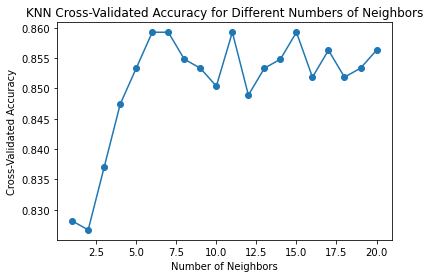

Accuracy with 7 neighbors:  0.8592592592592592


In [52]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

mean_scores = []

for n in n_grid:
    clf = KNeighborsClassifier(n_neighbors=n)

    scores = cross_val_score(clf, X_train, y_train, cv=5)
    mean_scores.append(np.mean(scores))

# Plotting the results
plt.plot(n_grid, mean_scores, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Cross-Validated Accuracy for Different Numbers of Neighbors')
plt.show()

print("Accuracy with 7 neighbors: ", mean_scores[6])

The steepest increase in accuracy is until 7 neighbors, then it slows down. The best chosen model is **` KNeighborsClassifier(n_neighbors = 7)`** with an **`accuracy of 0.8592592592592592`**. 

### Support Vector Machines

The hyperparameter tuning method I will be using is the random search method with `RandomizedSearchCV`.

First, I will check the accuracy of the default C = 1.

In [53]:
from sklearn.svm import SVC
clf2_default = SVC()
clf2_default.fit(X_train, y_train)

print("Default score of the SVC: ", clf2_default.score(X_test, y_test))


Default score of the SVC:  0.8488888888888889


In [54]:
from sklearn.svm import SVC
from scipy.stats import uniform 
clf2 = SVC()
tuning_C = {"C": uniform(loc = 0.0001, scale = 10)}

rs = RandomizedSearchCV(clf2, tuning_C, n_iter=30)
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVC(), n_iter=30,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fba2a3cf850>})

Now plot the accuracies:

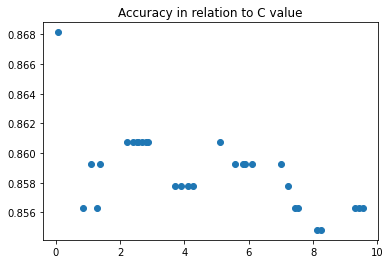

The best C parameter fromm the search:  0.07308299774200268
Best model:  SVC(C=0.07308299774200268) 
Best score:  0.8681481481481482


In [55]:
hypers = pd.DataFrame(rs.cv_results_["params"])
scores = pd.DataFrame(rs.cv_results_["mean_test_score"], columns = ["accuracy"])

df = pd.concat([hypers, scores], axis = 1)
df = df.sort_values("accuracy", ascending = False)

plt.scatter(df["C"], df["accuracy"])
plt.title("Accuracy in relation to C value")
plt.show()
print("The best C parameter fromm the search: ", rs.best_params_["C"])
print("Best model: ", rs.best_estimator_, "\nBest score: ", rs.best_score_)

The best model for the SVC for me is **`SVC(C=0.3654522572035017)`** and the best accuracy is **`0.8696296296296296`**.

In comparison the SVC(C=0.3654522572035017) with a score of 0.8696296296296296 performs better than the KNeighborsClassifier(n_neighbors = 5) with a score of accuracy of 0.8267. 